<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Project-description" data-toc-modified-id="Project-description-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Project description</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Showing-picture-sample" data-toc-modified-id="Showing-picture-sample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Showing picture sample</a></span></li><li><span><a href="#Findings" data-toc-modified-id="Findings-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Findings</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-Script-to-Run-on-the-GPU-Platform" data-toc-modified-id="Prepare-the-Script-to-Run-on-the-GPU-Platform-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prepare the Script to Run on the GPU Platform</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Output</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job! The project is accepted. Good luck on the final sprint! 

## Initialization

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

### Project description
The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage. You are asked to conduct that evaluation, so as you set to work, keep the following in mind:

* The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
* Computer vision methods can be used to determine age of a person from a photo
* The task then is to build and evaluate a model for verifying people's age

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# definitions
pd.options.display.float_format = '{:,.2f}'.format
state = np.random.RandomState(12345)

In [3]:
#set path
images_path = '/datasets/faces/final_files/'
labels_path = '/datasets/faces/labels.csv'

In [4]:
#read labels
labels = pd.read_csv(labels_path)

## EDA

In [5]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [6]:
labels['real_age'].value_counts().sort_index()

1      149
2       88
3       25
4      101
5       87
      ... 
94       5
95       2
96       2
97       1
100      1
Name: real_age, Length: 97, dtype: int64

ages are from 1 year old to 100 years young

In [7]:
labels.index.duplicated().sum(), labels.duplicated().sum()

(0, 0)

no duplicated in the labels (no more than one referance to each file

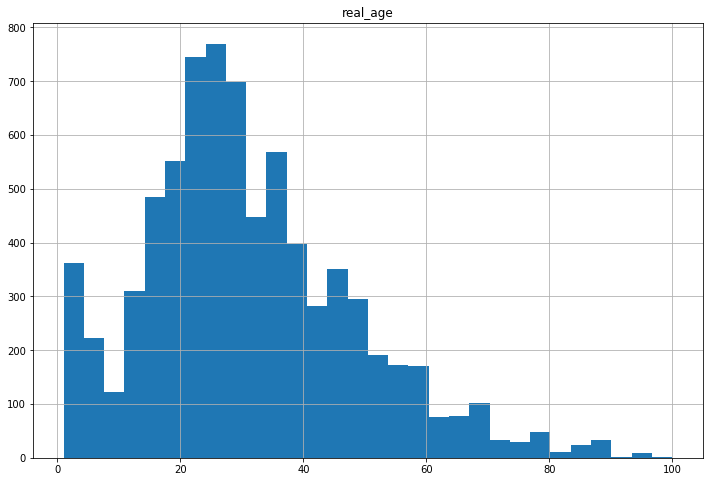

In [8]:
labels.hist(figsize=(12,8),bins=30);

In [9]:
print(f'The distribution is right skewed, the max age is {labels["real_age"].max()}, the min age is {labels["real_age"].min()} ')
print(f'The average age is {labels["real_age"].mean()}, the median age is {labels["real_age"].median()} ')

The distribution is right skewed, the max age is 100, the min age is 1 
The average age is 31.20115926755368, the median age is 29.0 


<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, you studied the target distribution!
	  
</div>

### Showing picture sample

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe= labels,
        directory= images_path,
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


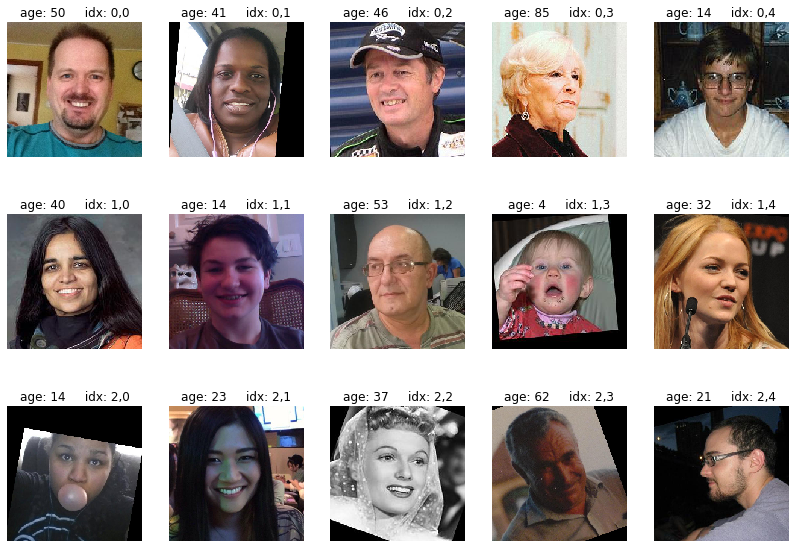

In [12]:
fig, axes = plt.subplots(3,5,figsize=(14,10))
x,y = train_gen_flow.next()

for i in range(15):
    a = i//5
    b = i%5
    image = x[i]
    label = y[i]
    axes[a,b].set_title(f"age: {label}     idx: {a},{b}")
    axes[a,b].imshow(image)
    axes[a,b].set_axis_off()

### Findings

* Some of the pictures are B&W, some in colors
* The brightnes of the pictures is not equal 
* Not all the pictures are with clear faces
* Some pictures are rotated

Augmentation could use horizontal_flip, vertical_flip, brightness_range and rotation_range

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [13]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [40]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    # place your code here
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1.0 / 255
        #horizontal_flip = True,
        #vertical_flip = True,
        #rotation_range = 30,
        #width_shift_range = 0.2,
        #height_shift_range = 0.2
    )
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv('/datasets/faces/labels.csv'),
        directory='/datasets/faces/final_files/',
        #path+'final_files/'
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345
    )
    return train_gen_flow

In [34]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    # place your code here
    test_datagen = ImageDataGenerator(
        validation_split=0.25, rescale=1.0 / 255
    )
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv('/datasets/faces/labels.csv'),
        directory='/datasets/faces/final_files/',
        #path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345
    )
    return test_gen_flow

In [41]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    
    # place your code here
    backbone = ResNet50(
        input_shape=input_shape, weights='imagenet', include_top=False
    )
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(
        #optimizer=Adam(),
        optimizer=Adam(learning_rate=0.00045),
        loss='mse',
        metrics=['mae']
    )
    return model

In [38]:
def train_model(model, 
                train_data,
                test_data, 
                batch_size=None, 
                epochs=5,
                steps_per_epoch=None, 
                validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    # place your code here
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [42]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

  ['...']

Train for 356 steps, validate for 119 steps

Epoch 1/5

2021-12-02 05:03:09.640865: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2021-12-02 05:03:13.392101: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

356/356 - 108s - loss: 203.7176 - mae: 10.7045 - val_loss: 491.4319 - val_mae: 17.0583

Epoch 2/5

356/356 - 38s - loss: 124.9454 - mae: 8.5820 - val_loss: 244.8654 - val_mae: 11.6495

Epoch 3/5

356/356 - 37s - loss: 84.4797 - mae: 7.0128 - val_loss: 125.7023 - val_mae: 8.7164

Epoch 4/5

356/356 - 37s - loss: 59.1964 - mae: 5.9217 - val_loss: 106.9418 - val_mae: 7.6108

Epoch 5/5

356/356 - 37s - loss: 41.1379 - mae: 4.9828 - val_loss: 114.2021 - val_mae: 8.4123


<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The model was trained successfully
	  
</div>

## Conclusions

* we created model to determine the age of a person based on his/her picture.
* It is possible to evaluate the ages of customers, but the error (MAE) is 7.61 (4th epoch on the test set). It is not accepted ligally for determine on liquer sale.
* Every epoch took about 2 minutes, and because of limitation of the system, we couldnt run more than 30 minutes. 
* The etest MAE doesnt decline as the train MAE every epoch. Possible because of overfitting.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Conclusions look good. It's great that you commented on the suitability of the model for the business case!
    
	  
</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training